## _Оценка изменения вида окна покупки на сайте_

Игра содержит особое событие – ивент, для прохождения которого пользователи могут тратить деньги. Группа дизайнеров решила поменять вид окошка покупки ивентовых продуктов. Чтобы оценить результат нововведения, провели АБ тест, разделив пользователей на две группы: контрольную и тестовую (с окошком нового типа).

Задача
Исследовать какая из АБ групп лучше себя показала. Результаты предоставить в понятной для широкой аудитории форме, сопроводив по необходимости графиками/дашбордами/числами.
## Пробуем топорным методом через бутстреп

In [20]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('test_task_product_analyst_2021_20210427.csv')
df.head()

,AbGroup,user_id,time_stamp,install_date,event_name,platform,network_name,country_name,InGameTime,LastCompletedLevel,avg_energy_amount,revenue_on_event,revenue_on_other_activities,gold_on_event,gold_on_other_activities
0,Control,d60ebcaecff2dc1d360a8a41271e6fd8a902c107,2020-02-10,2019-11-10,ResourceSpend,itunes,Organic,United Kingdom of Great Britain and Northern I...,276180,345,54.0,0.0,0.0,NaN,NaN
1,Test,f6e385b0ab43d5aea9cfcc408aa84029a4ea5fdb,2020-03-04,2019-11-05,ResourceSpend,itunes,Paid,United States of America,166095,199,50.0,0.0,0.0,NaN,NaN
2,Control,a4c80c8524e2c11cc238553d7b02da01ce2aad66,2020-02-26,2020-01-02,ResourceSpend,itunes,Paid,Canada,240986,84,39.0,0.0,0.0,NaN,NaN
3,Control,7ea2e4599ae33760c307e254839317bd5b17a63c,2020-02-21,2020-01-13,ResourceSpend,itunes,Organic,France,989822,1176,21.0,0.0,0.0,NaN,NaN
4,Control,6495168982929360dc6d84bf0766d8963a7ddc41,2020-02-18,2020-02-05,ResourceSpend,itunes,Paid,Spain,52106,66,43.0,0.0,0.0,500.0,NaN


_Смотрим на данные_:
* AbGroup – имя АБ группы: Control/Test
* user_id – id пользователя
* time_stamp – день события
* install_date – день установки приложения пользователем
* event_name – техническое название события (InAppPurchase - в случае покупки за деньги, ResourceSpend в случае покупки за игровую валюту)
* platform – платформа google / itunes
* network_name – пользователь установил игру по переходу с рекламы (Paid) или нет (Organic)
* country_name – страна пользователя
* InGameTime – сколько всего пользователь провел в игре секунд
* LastCompletedLevel – номер последнего пройденного уровня
* avg_energy_amount – сколько в среднем энергии было у пользователя за день
* revenue_on_event – ревеню, потраченное на покупку ивентовых продуктов 
* revenue_on_other_activities – ревеню, потраченное на остальные продукты, включая золото
* gold_on_event – золото, потраченное на ивентный прогресс
* gold_on_other_activities – золото, потраченное на другие продукты

In [3]:
# Количество строк
len(df)

696840

Смотрим распределение тестовой и контрольной группы

In [6]:
df['AbGroup'].value_counts(normalize=True) # тест обычно меньше, чтобы не распугать пользователей)

Control    0.800858
Test       0.199142
Name: AbGroup, dtype: float64

Посмотрим есть ли уникальные пользователи и сколько их

In [8]:
df.groupby('AbGroup')['user_id'].agg(['count','nunique'])

,count,nunique
AbGroup,,
Control,558070,89034
Test,138770,22278


Посмотрим, сколько дней шло тестирование, для этого переведем формат даты установки приложения и произошедшего события в дату

In [12]:
df['time_stamp'] = pd.to_datetime(df['time_stamp'], format='%Y-%m-%d')
df['install_date'] = pd.to_datetime(df['install_date'], format = '%Y-%m-%d')

<AxesSubplot:xlabel='time_stamp'>

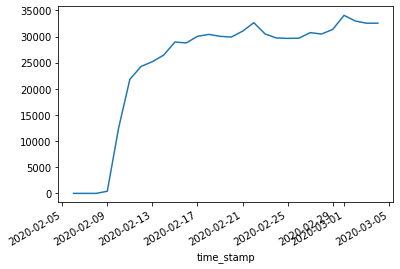

In [13]:
df.groupby('time_stamp')['user_id'].count().plot()

Что является ключевой метрикой по которой будем сравнивать? пройдемся по фичам revenue_on_event','revenue_on_other_activities', 'gold_on_event','gold_on_other_activities'

In [15]:
df[['revenue_on_event',
       'revenue_on_other_activities', 'gold_on_event',
       'gold_on_other_activities']].describe()

,revenue_on_event,revenue_on_other_activities,gold_on_event,gold_on_other_activities
count,696840.0,696840.0,45412.000000,168193.000000
mean,0.0,0.0,1992.865322,936.481899
std,0.0,0.0,3895.541280,3522.989145
min,0.0,0.0,500.000000,100.000000
25%,0.0,0.0,500.000000,500.000000
50%,0.0,0.0,1000.000000,600.000000
75%,0.0,0.0,2400.000000,1000.000000
max,0.0,0.0,189600.000000,755950.000000


Скорее всего у нас потенциально две метрики - gold_on_event и gold_on_other_activities, посмотрим на гистрограмки

<AxesSubplot:>

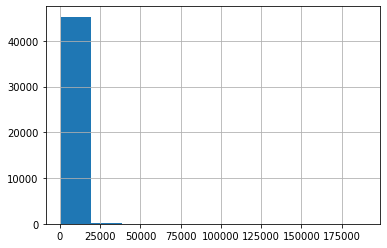

In [19]:
df['gold_on_event'].hist()

Text(0.5, 1.0, 'Gold_on_event')

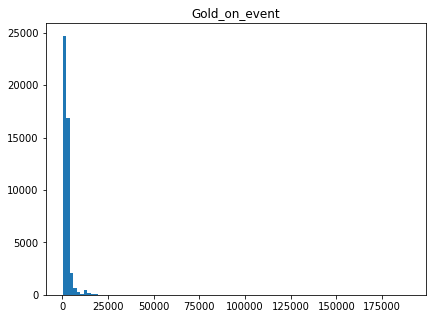

In [22]:
plt.figure(figsize=(15,5))
plt.subplot(121)
plt.hist(df['gold_on_event'], bins=100)
plt.title('Gold_on_event')

<AxesSubplot:>

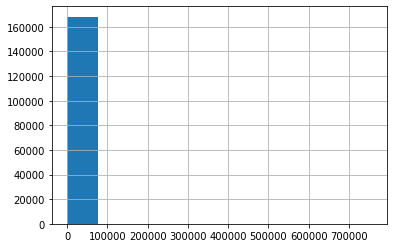

In [17]:
df['gold_on_other_activities'].hist()

Text(0.5, 1.0, 'gold_on_other_activities')

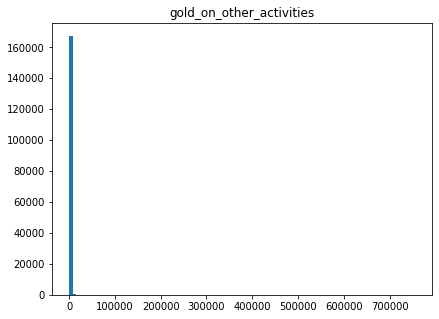

In [28]:
plt.figure(figsize =(15,5))
plt.subplot(121)
plt.hist(df['gold_on_other_activities'], bins= 100)
plt.title('gold_on_other_activities')

Видим ну очень жирные хвосты

Переведем переменные в бинарные переменные, чтобы работать было понятнее

In [29]:
df['gold_on_event_flag'] = (df['gold_on_event'] > 0)*1
df['gold_on_other_activities_flag'] = (df['gold_on_other_activities'] > 0)*1

Сравним средние и медианы во флаге и заданном таргете

In [30]:
df.groupby(['AbGroup'])[['gold_on_event_flag', 'gold_on_event']].agg({'gold_on_event_flag':['count', 'mean'], 'gold_on_event':['count', 'mean']})

gold_on_event_flag          gold_on_event             
                     count     mean         count         mean
AbGroup                                                       
Control             558070  0.06523         36403  1965.211658
Test                138770  0.06492          9009  2104.606505

Посмотрим, попадает пользователь в разные группы?

In [38]:
t = df.groupby('user_id')['AbGroup'].nunique().reset_index() # можно как-то через query
t[t['AbGroup'] > 1]

,user_id,AbGroup
202,007a61c7cc84aa559280c6d222aa3e15cb5e0114,2
208,007c891d5eb34c1398966a836d74a123452384de,2
895,02125379d8faf43debf755edfb32758ea5d789d8,2
1097,028e3fc09324ac6df71fccf432dabe44e476956c,2
1107,02977b73d35305fc135ea01bfcc9e1aa334d480a,2
...,...,...
110097,fe08c305b0317eecc6b5cf3cc5362fc912afdc0b,2
110362,fea60891a7ef95c7b95a0b1e58cb9d755684b3de,2
110480,fef449646b98d04def88b9ddb45e7c43bd9a278a,2
110515,ff079e7288b379b4e47650da302a5cc23e8c7ad3,2


Шумовых пользователей мало, можно забить болт

In [40]:
t = (df.groupby(['user_id','AbGroup'])[['gold_on_event_flag','gold_on_event']]
 .agg({'gold_on_event_flag':['count','mean'],
       'gold_on_event':['mean','median']})).reset_index()

In [41]:
t.head()

user_id  AbGroup gold_on_event_flag  \
                                                                  count   
0  00000d6d79ec151d74c5b0c0705d9d9fe252fe83  Control                  2   
1  000133682d2dcd90c1a9c8ca5e34a294f31af64f  Control                 19   
2  0001f13b0535b174bc7e36a1846c31c7a091c4b0  Control                 11   
3  00021d57aced59fbfaf63ba620afada82fc06ca8     Test                 13   
4  00027b7d34e10c17bfd4f76aa626403a2c5d1044     Test                  7   

            gold_on_event          
       mean          mean  median  
0  0.000000           NaN     NaN  
1  0.105263        1250.0  1250.0  
2  0.000000           NaN     NaN  
3  0.000000           NaN     NaN  
4  0.000000           NaN     NaN

Пробуем избавиться от мульти индекса

In [43]:
t.columns = ['_'.join(el) for el in t.columns.to_flat_index()]
t.head()

,user_id_,AbGroup_,gold_on_event_flag_count,gold_on_event_flag_mean,gold_on_event_mean,gold_on_event_median
0,00000d6d79ec151d74c5b0c0705d9d9fe252fe83,Control,2,0.000000,NaN,NaN
1,000133682d2dcd90c1a9c8ca5e34a294f31af64f,Control,19,0.105263,1250.0,1250.0
2,0001f13b0535b174bc7e36a1846c31c7a091c4b0,Control,11,0.000000,NaN,NaN
3,00021d57aced59fbfaf63ba620afada82fc06ca8,Test,13,0.000000,NaN,NaN
4,00027b7d34e10c17bfd4f76aa626403a2c5d1044,Test,7,0.000000,NaN,NaN


In [45]:
t['user'] = 1

In [46]:
t.groupby('AbGroup_').agg(['count','mean'])

C:\Users\user\AppData\Local\Temp/ipykernel_13148/3019368485.py:1: FutureWarning: ['user_id_'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  t.groupby('AbGroup_').agg(['count','mean'])


gold_on_event_flag_count           gold_on_event_flag_mean            \
                            count      mean                   count      mean   
AbGroup_                                                                        
Control                     89034  6.268055                   89034  0.031600   
Test                        22278  6.229015                   22278  0.030891   

         gold_on_event_mean              gold_on_event_median               \
                      count         mean                count         mean   
AbGroup_                                                                     
Control               10685  2119.778819                10685  2002.976135   
Test                   2603  2417.938571                 2603  2296.811371   

           user       
          count mean  
AbGroup_              
Control   89034  1.0  
Test      22278  1.0

In [48]:
group_size = df['AbGroup'].value_counts().values
group_size

array([558070, 138770], dtype=int64)

In [49]:
(df.groupby(['AbGroup'])
[['gold_on_event_flag','gold_on_event']]
 .agg({'gold_on_event_flag':['count','mean'],
       'gold_on_event':['mean','median']}))

gold_on_event_flag          gold_on_event        
                     count     mean          mean  median
AbGroup                                                  
Control             558070  0.06523   1965.211658  1000.0
Test                138770  0.06492   2104.606505  1500.0

Попробуем сделать бутстрап

In [50]:
from tqdm.notebook import tqdm

In [51]:
n = 1000
result = []
base_diff = 500 # разница между контрольной и тестовой групповй

for _ in tqdm(range(n)):
  a = df.sample(group_size[0],replace=True)['gold_on_event'].median() 
  b = df.sample(group_size[1],replace=True)['gold_on_event'].median()
  result.append(np.abs(a-b) >= base_diff) # двухсторонний тест - поэтому считаем по мощности
   # сэмплируем перемешанную группу и считаем медиану для груп размером контрольной или тестовой выборки, а потом будем считать вероятность того, что различий нет

  0%|          | 0/1000 [00:00<?, ?it/s]

In [52]:
np.mean(result) # вероятность получить такую же выборку (случайно)

0.13

Достаточная высокая вероятность, попробуем провести такой же эксперимент для среднего

In [53]:
n = 1000
result = []
base_diff = 2104.606505 - 1965.211658

for _ in tqdm(range(n)):
  a = df.sample(group_size[0],replace=True)['gold_on_event'].mean()
  b = df.sample(group_size[1],replace=True)['gold_on_event'].mean()
  result.append(np.abs(a-b) >= base_diff)

  0%|          | 0/1000 [00:00<?, ?it/s]

In [54]:
np.mean(result)

0.005

Попробуем запонить NAN и посмотрим как изменилась медиана

In [55]:
df['gold_on_event_nona'] = df['gold_on_event'].fillna(0)
(df.groupby(['AbGroup'])
[['gold_on_event_nona']]
 .agg(['mean','median']))

gold_on_event_nona       
                      mean median
AbGroup                          
Control         128.191087    0.0
Test            136.631837    0.0

In [56]:
n = 1000
result = []
base_diff = 136.631837 - 128.191087

for _ in tqdm(range(n)):
  a = df.sample(group_size[0],replace=True)['gold_on_event_nona'].mean()
  b = df.sample(group_size[1],replace=True)['gold_on_event_nona'].mean()
  result.append(np.abs(a-b) >= base_diff)

  0%|          | 0/1000 [00:00<?, ?it/s]

In [57]:
np.mean(result)

0.007

Вероятность получения такого результата результата около 2%, мы не задавали мощность, можно сказать, что другой дизайн дал результат. Нулевая гипотеза отвергается. Т.е. те, кто прошел по новой кнопке больше с вероятностью  98%